In [2]:
# Step 1: Install & Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.optimizers import Adam

from google.colab import files


In [3]:
# Step 2: Upload the CSV file
uploaded = files.upload()


Saving apple_stock_data.csv to apple_stock_data.csv


In [4]:
# Load and view the dataset
df = pd.read_csv('apple_stock_data.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values('Date', inplace=True)
df.head()


,Date,Adj Close,Close,High,Low,Open,Volume
0,2023-11-02 00:00:00+00:00,176.665985,177.570007,177.779999,175.460007,175.520004,77334800
1,2023-11-03 00:00:00+00:00,175.750671,176.649994,176.820007,173.350006,174.240005,79763700
2,2023-11-06 00:00:00+00:00,178.317520,179.229996,179.429993,176.210007,176.380005,63841300
3,2023-11-07 00:00:00+00:00,180.894333,181.820007,182.440002,178.970001,179.179993,70530000
4,2023-11-08 00:00:00+00:00,181.958893,182.889999,183.449997,181.589996,182.350006,49340300


from matplotlib import pyplot as plt
_df_0['Adj Close'].plot(kind='hist', bins=20, title='Adj Close')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Close'].plot(kind='hist', bins=20, title='Close')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['High'].plot(kind='hist', bins=20, title='High')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Low'].plot(kind='hist', bins=20, title='Low')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Adj Close', y='Close', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Close', y='High', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='High', y='Low', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Low', y='Open', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Adj Close']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Adj Close')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Close']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Close')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['High']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('High')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Low']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Low')

from matplotlib import pyplot as plt
_df_12['Adj Close'].plot(kind='line', figsize=(8, 4), title='Adj Close')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['Close'].plot(kind='line', figsize=(8, 4), title='Close')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['High'].plot(kind='line', figsize=(8, 4), title='High')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['Low'].plot(kind='line', figsize=(8, 4), title='Low')
plt.gca().spines[['top', 'right']].set_visible(False)

In [5]:
# Step 3: Normalize the Close price using MinMaxScaler
data = df[['Close']].values  # Use only the 'Close' column
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Create sequences of 60 previous days to predict the next day
X_lstm = []
y_lstm = []

for i in range(60, len(scaled_data)):
    X_lstm.append(scaled_data[i-60:i, 0])
    y_lstm.append(scaled_data[i, 0])

# Convert to numpy arrays and reshape for LSTM input
X_lstm = np.array(X_lstm)
y_lstm = np.array(y_lstm)
X_lstm = np.reshape(X_lstm, (X_lstm.shape[0], X_lstm.shape[1], 1))  # 3D shape for LSTM


In [6]:
# Step 4: Split the data into training and testing sets
split = int(len(X_lstm) * 0.8)
X_train, X_test = X_lstm[:split], X_lstm[split:]
y_train, y_test = y_lstm[:split], y_lstm[split:]

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))  # Output layer

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - loss: 0.1800
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0366
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0361
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.0181
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.0234
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.0140
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.0129
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0120
Epoch 9/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0115
Epoch 10/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.0100
Epoch 11/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.0095
Epoch 12/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.0105
Epoch 13/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.0089
Epoch 14/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0100
Epoch 15/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0085
Epoch 16/20
5/5 ━━━━━━━━━━━━━━━━━━

In [7]:
# Step 5: Prepare data for Linear Regression
# Use simple past price (lagged) feature
df_lr = df[['Close']].copy()
df_lr['Close_Lag1'] = df_lr['Close'].shift(1)
df_lr.dropna(inplace=True)

X_lr = df_lr[['Close_Lag1']]
y_lr = df_lr['Close']

# Split the data into train and test sets (based on length of y_test)
X_lr_train, X_lr_test = X_lr[:-len(y_test)], X_lr[-len(y_test):]
y_lr_train, y_lr_test = y_lr[:-len(y_test)], y_lr[-len(y_test):]

# Build and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_lr_train, y_lr_train)

# Make predictions
lr_predictions = lr_model.predict(X_lr_test).reshape(-1, 1)


In [9]:
# LSTM Predictions
lstm_predictions = model.predict(X_test)
lstm_predictions_rescaled = scaler.inverse_transform(lstm_predictions.reshape(-1, 1))


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 563ms/step


In [11]:
# Combine LSTM and Linear Regression Predictions
final_predictions = (lstm_predictions_rescaled + lr_predictions) / 2


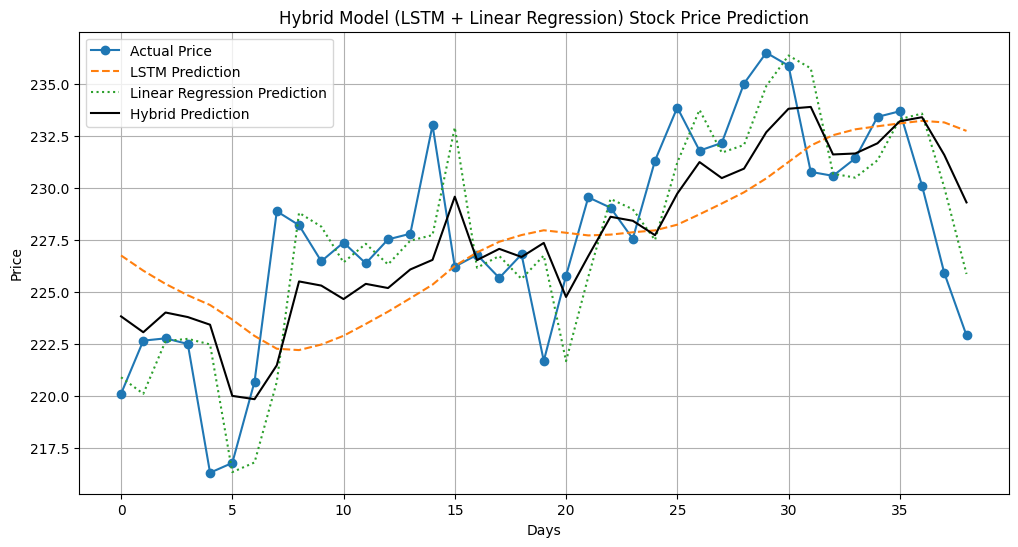

In [12]:
# Step 7: Plot Results
actual = df['Close'].values[-len(y_test):]

plt.figure(figsize=(12, 6))
plt.plot(actual, label='Actual Price', marker='o')
plt.plot(lstm_predictions_rescaled, label='LSTM Prediction', linestyle='--')
plt.plot(lr_predictions, label='Linear Regression Prediction', linestyle=':')
plt.plot(final_predictions, label='Hybrid Prediction', color='black')
plt.legend()
plt.title("Hybrid Model (LSTM + Linear Regression) Stock Price Prediction")
plt.xlabel("Days")
plt.ylabel("Price")
plt.grid(True)
plt.show()
